<H1>IMPORTING LIBRARIES


In [2]:
import pandas 
import numpy
import matplotlib
import seaborn
import json

In [3]:
with open("statemnt.json", "r") as f:
    data = json.load(f)

df = pandas.DataFrame(data['transactions'])

<H1>DATASET

In [4]:
df

,date,description,type,amount,balance
0,2024-01-04,Online Shopping - Amazon,credit,3800.37,13800.37
1,2024-01-06,Water Bill,debit,1322.61,12477.76
2,2024-01-08,Water Bill,debit,2677.33,9800.43
3,2024-01-12,Movie Tickets,debit,3429.81,6370.62
4,2024-01-13,Internet Bill,credit,4488.76,10859.38
5,2024-01-17,Paycheck,credit,1121.01,11980.39
6,2024-01-18,Mobile Recharge,credit,3284.27,15264.66
7,2024-01-19,Online Shopping - Amazon,debit,2667.39,12597.27
8,2024-01-22,Paycheck,debit,2066.18,10531.09
9,2024-01-23,Cash Deposit,credit,1618.22,12149.31


<h1>EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         35 non-null     object 
 1   description  35 non-null     object 
 2   type         35 non-null     object 
 3   amount       35 non-null     float64
 4   balance      35 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.5+ KB


In [6]:
df.columns

Index(['date', 'description', 'type', 'amount', 'balance'], dtype='object')

In [7]:
df.describe()

,amount,balance
count,35.000000,35.000000
mean,2387.332857,7490.123714
std,1482.152559,4231.242939
min,190.310000,789.750000
25%,1108.735000,3915.795000
50%,2445.180000,7889.550000
75%,3366.905000,10943.195000
max,4972.930000,15264.660000


In [9]:
# unique values in the 'type' column
for i in df.columns:
    print(f"Unique values in column '{i}':")
    print(df[i].unique())
    print()  # Print a newline for better readability

Unique values in column 'date':
['2024-01-04' '2024-01-06' '2024-01-08' '2024-01-12' '2024-01-13'
 '2024-01-17' '2024-01-18' '2024-01-19' '2024-01-22' '2024-01-23'
 '2024-01-26' '2024-01-30' '2024-02-02' '2024-02-03' '2024-02-06'
 '2024-02-08' '2024-02-12' '2024-02-16' '2024-02-18' '2024-02-19'
 '2024-02-22' '2024-02-26' '2024-03-01' '2024-03-05' '2024-03-06'
 '2024-03-10' '2024-03-11' '2024-03-13' '2024-03-14' '2024-03-16'
 '2024-03-20' '2024-03-21' '2024-03-24' '2024-03-25' '2024-03-29']

Unique values in column 'description':
['Online Shopping - Amazon' 'Water Bill' 'Movie Tickets' 'Internet Bill'
 'Paycheck' 'Mobile Recharge' 'Cash Deposit' 'Dining - Restaurant'
 'Grocery Store' 'Gym Membership' 'UPI Payment' 'IMPS Transfer'
 'Electricity Bill' 'NEFT Transfer' 'Mutual Fund Investment']

Unique values in column 'type':
['credit' 'debit']

Unique values in column 'amount':
[3800.37 1322.61 2677.33 3429.81 4488.76 1121.01 3284.27 2667.39 2066.18
 1618.22  965.36 2598.51 4790.61  207.7

<H1>STATISTICAL ANALYSIS

In [19]:
# credit and debit amounts by description
df['amount'] = numpy.where(df['type'] == 'credit', df['amount'], -df['amount']) 
df['amount'] = df['amount'].astype(float)
# total amount by description
df[['amount','description']].groupby('description').sum().sort_values(by='amount', ascending=False)

,amount
description,
Cash Deposit,7490.01
Gym Membership,6149.17
Internet Bill,4082.80
Mutual Fund Investment,3741.65
Electricity Bill,3446.51
Dining - Restaurant,2598.51
Mobile Recharge,2234.94
Online Shopping - Amazon,1132.98
IMPS Transfer,-1631.06


In [23]:
# grouping by month the balance
df['date'] = pandas.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df[['balance','month']].groupby('month').mean().sort_values(by='month', ascending=False)

,balance
month,
2024-03,5120.071538
2024-02,5479.571000
2024-01,11733.140833


In [24]:
df.groupby('description').agg({'amount': 'sum', 'balance': 'mean'}).sort_values(by='amount', ascending=False)

,amount,balance
description,,
Cash Deposit,7490.01,9414.770000
Gym Membership,6149.17,7473.353333
Internet Bill,4082.80,8282.345000
Mutual Fund Investment,3741.65,4840.890000
Electricity Bill,3446.51,4536.490000
Dining - Restaurant,2598.51,13782.460000
Mobile Recharge,2234.94,9016.920000
Online Shopping - Amazon,1132.98,13198.820000
IMPS Transfer,-1631.06,789.750000


In [26]:
df.groupby('type').agg({'amount': 'sum', 'balance': 'mean'}).sort_values(by='amount', ascending=False)

,amount,balance
type,,
credit,39198.77,8568.328125
debit,-44357.88,6582.162105


In [29]:
# grouping debit and credit amount and bALANCE BY week
df['week'] = df['date'].dt.to_period('W')
df['week'] = df['week'].astype(str)  # Convert Period to string for better readability
df[['amount', 'balance', 'week']].groupby('week').sum().sort_values(by='amount', ascending=False)
# grouping debit and credit amount and balance by week
df.groupby('week').agg({'amount': 'sum', 'balance': 'mean'}).sort_values(by='week', ascending=True)

,amount,balance
week,,
2024-01-01/2024-01-07,2477.76,13139.065000
2024-01-08/2024-01-14,-1618.38,9010.143333
2024-01-15/2024-01-21,1737.89,13280.773333
2024-01-22/2024-01-28,-1413.32,11288.116667
2024-01-29/2024-02-04,-2399.84,10519.473333
2024-02-05/2024-02-11,2242.90,9699.580000
2024-02-12/2024-02-18,-8606.20,4745.796667
2024-02-19/2024-02-25,-1440.75,884.905000
2024-02-26/2024-03-03,2838.45,2715.950000


<h1>
VIUSALIZATIONS

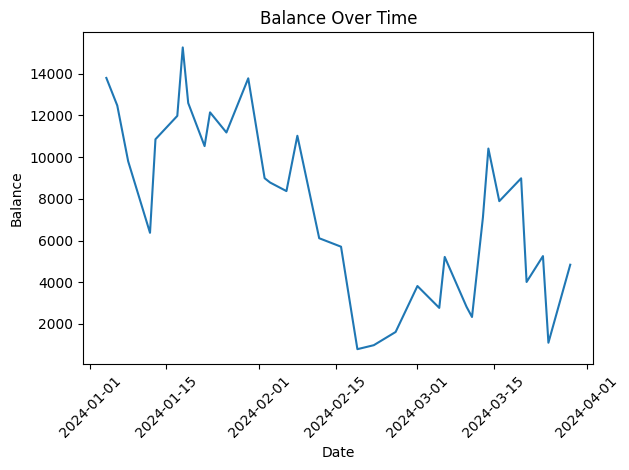

In [31]:
# Line plot of balance over time
matplotlib.pyplot.plot(df['date'], df['balance'])
matplotlib.pyplot.title('Balance Over Time')
matplotlib.pyplot.xlabel('Date')
matplotlib.pyplot.ylabel('Balance')
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

C:\Users\kaush\AppData\Local\Temp\ipykernel_9176\3127508047.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x='amount', y='description', data=df_description, palette='viridis')


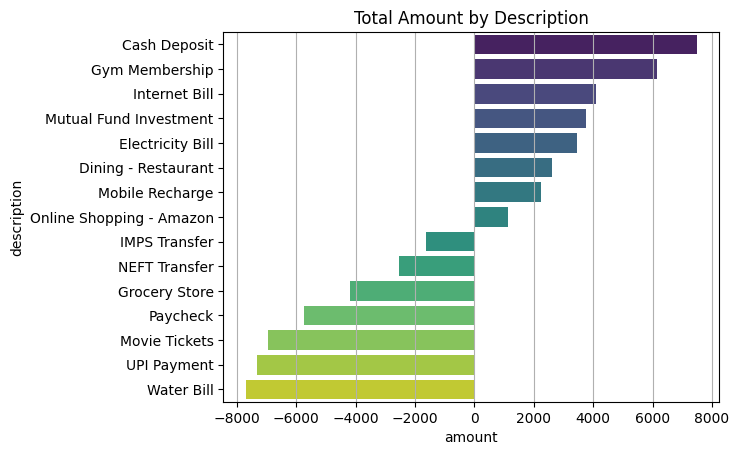

In [36]:
# Grouping by 'description' and summing 'amount'
df_description = df.groupby('description').agg({'amount': 'sum'}).reset_index()
# Sorting by 'amount' in descending order
df_description = df_description.sort_values(by='amount', ascending=False)
# Bar plot of total amount by description
seaborn.barplot(x='amount', y='description', data=df_description, palette='viridis')
matplotlib.pyplot.title('Total Amount by Description')
matplotlib.pyplot.grid(axis='x')

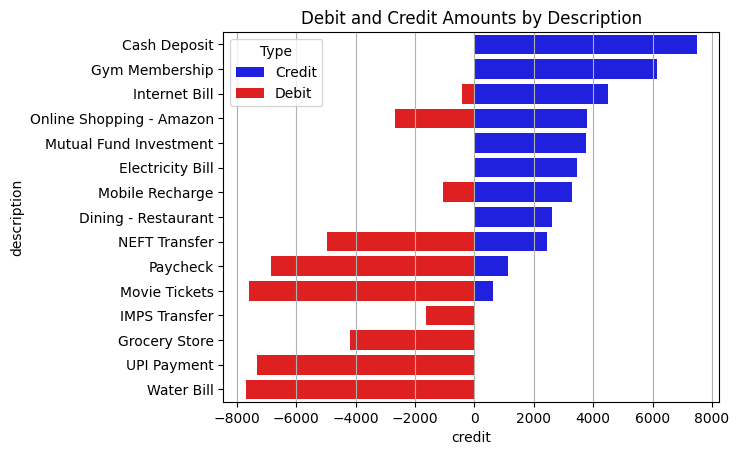

In [37]:
# double bar plot of debit and credit amounts by description
df_debit_credit = df.groupby(['description', 'type']).agg({'amount': 'sum'}).unstack().fillna(0)
df_debit_credit.columns = df_debit_credit.columns.droplevel(0)  # Flatten the MultiIndex columns
df_debit_credit = df_debit_credit.reset_index()
df_debit_credit = df_debit_credit.sort_values(by='credit', ascending=False)
seaborn.barplot(x='credit', y='description', data=df_debit_credit, color='blue', label='Credit')
seaborn.barplot(x='debit', y='description', data=df_debit_credit, color='red', label='Debit')
matplotlib.pyplot.title('Debit and Credit Amounts by Description')
matplotlib.pyplot.legend(title='Type')
matplotlib.pyplot.grid(axis='x')

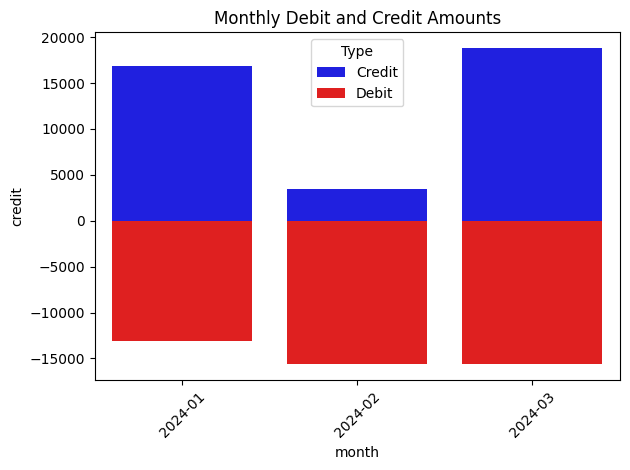

In [39]:
# vertical double bar plot of debit and credit amounts by Month
df_monthly = df.groupby(['month', 'type']).agg({'amount': 'sum'}).unstack().fillna(0)
df_monthly.columns = df_monthly.columns.droplevel(0)  # Flatten the MultiIndex columns
df_monthly = df_monthly.reset_index()
df_monthly = df_monthly.sort_values(by='month', ascending=True)
seaborn.barplot(x='month', y='credit', data=df_monthly, color='blue', label='Credit')
seaborn.barplot(x='month', y='debit', data=df_monthly, color='red', label='Debit')
matplotlib.pyplot.title('Monthly Debit and Credit Amounts')
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.legend(title='Type')
matplotlib.pyplot.tight_layout()